C:\Users\dany.pianchiche\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'te

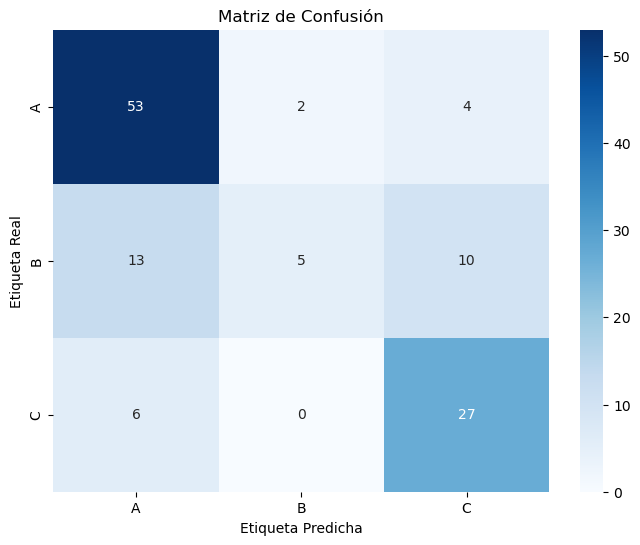

In [74]:
import tkinter as tk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

# Función para predecir la categoría de una canción y mostrar las métricas en la interfaz gráfica
def predict_category():
    lyrics = lyrics_box.get('1.0', tk.END)
    lyrics_array = [lyrics]
    lyrics_vector = vectorizer.transform(lyrics_array)
    result = clf.predict(lyrics_vector)
    genre_label.config(text="Categoría: " + result[0])
    
    # Calcular métricas
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics_label.config(text=f"Exactitud: {accuracy:.2f}\nPrecisión: {precision:.2f}\nRecuperación: {recall:.2f}\nPuntuación F1: {f1:.2f}")
    
    # Calcular y mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=unique_labels(y_test, y_pred), title='Matriz de Confusión')

def plot_confusion_matrix(cm, classes, title='Matriz de Confusión'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.show()

# Cargar la base de datos de canciones
df = pd.read_csv("datos.txt", sep=',', names=['categ', 'txt'], encoding='latin-1')


# Preprocesar los datos
stopset = set(stopwords.words('spanish'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

y = df.categ
X = vectorizer.fit_transform(df.txt)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# ALGORITMO DE REGRESIÓN LOGÍSTICA
clf = LogisticRegression(max_iter=1000, C=1.5,multi_class='multinomial')  # Puedes ajustar otros parámetros aquí
clf.fit(X_train, y_train)


# Interfaz gráfica de usuario
root = tk.Tk()
root.title("Analizar Letras de Canciones")

lyrics_label = tk.Label(root, text="Letra de la Canción:")
lyrics_box = tk.Text(root, height=10)
predict_button = tk.Button(root, text="Predecir Categoría", command=predict_category)
genre_label = tk.Label(root, text="Categoría: ")
metrics_label = tk.Label(root, text="", justify='left')

lyrics_label.grid(row=0, column=0, padx=10, pady=10)
lyrics_box.grid(row=0, column=1, padx=10, pady=10)
predict_button.grid(row=1, column=0, columnspan=2, pady=10)
genre_label.grid(row=2, column=0, columnspan=2, padx=10, pady=10)
metrics_label.grid(row=3, column=0, columnspan=2, padx=10, pady=10)

root.mainloop()


